In [4]:
import pandas as pd
import requests as r
import sqlalchemy
import time
import praw
import datetime as dt
from psaw import PushshiftAPI

In [5]:
api=PushshiftAPI()
searchs = api.search_submissions(q="trump",
                            subreddit='PoliticalDiscussion',
                            filter=['subreddit','author', 'title', 'subreddit','selftext'])



In [6]:
dftrump = pd.DataFrame([submission.d_ for submission in searchs])
dftrump

C:\Users\Argo\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
C:\Users\Argo\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\Argo\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


author  created_utc  \
0             Joinkiee   1634163420   
1      SmashingTablets   1634153049   
2         AncientSyrup   1634074094   
3      meghanmccain136   1634024422   
4       TaylorSwiftian   1633969307   
...                ...          ...   
20893        [deleted]   1332200303   
20894        [deleted]   1315952318   
20895   ArmchairExpurt   1315037688   
20896          jteachs   1312251324   
20897     johnnyryalle   1303988356   

                                                selftext            subreddit  \
0                                              [removed]  PoliticalDiscussion   
1                                              [removed]  PoliticalDiscussion   
2                                              [removed]  PoliticalDiscussion   
3                                              [removed]  PoliticalDiscussion   
4                                              [removed]  PoliticalDiscussion   
...                                                  ...                  ...   
20893  I want a strong conservative point of view and...  PoliticalDiscussion   
20894  The last few years have left a bad taste in my...  PoliticalDiscussion   
20895  The fear that most people have of a nuclear-ca...  PoliticalDiscussion   
20896  The more it seems to me they really screwed th...  PoliticalDiscussion   
20897  So this whole birther fiasco was started by th...  PoliticalDiscussion   

                                                   title       created  
0      Anyone have Donald Trump old video saying "he ...  1.634181e+09  
1                                             Trump Cult  1.634171e+09  
2      Can China's present power crisis be used by pe...  1.634092e+09  
3      Bob Woodward Describes the State of the GOP as...  1.634042e+09  
4      Are Republicans loyalty/fondness to Trump diff...  1.633987e+09  
...                                                  ...           ...  
20893  Just found out that FOX News is actually illeg...  1.332218e+09  
20894  Compromise vs. Capitulation \n(opinion piece s...  1.315970e+09  
20895  The drumbeat for war against Iran is beginning...  1.315056e+09  
20896                   The More I hear from Republicans  1.312269e+09  
20897                  The Birth of the Birther Movement  1.304006e+09  

[20898 rows x 6 columns]

In [39]:
# data_df=pd.read_csv("Data_project-3 - Sheet1.csv", dtype={"title":"string"})
# data_df= data_df[["title"]]
# data_df.iloc[1458]

title    <NA>
Name: 1458, dtype: string

In [10]:
dftrump1 = dftrump[["title"]]
dftrump1 = dftrump1.sample(frac=1).reset_index(drop=True)
dftrump1

title
0                    Honestly, why should we trust Trump
1                                            TRUMP SUCKS
2      The Trump campaign is saying ANTIFA is going t...
3      A question for the under 30 crowd that are big...
4      How can anyone believe that asking people if t...
...                                                  ...
20893  Does Trumps Success Courting Evangelicals Give...
20894  How would it actually be like at a Trump rally...
20895  If Trump loses and his followers try to revolt...
20896  Is there precedent for a presidential candidat...
20897  Mods explain yourselves! Why have you been del...

[20898 rows x 1 columns]

In [11]:
dftrump2= dftrump1.drop_duplicates()
dftrump2

title
0                    Honestly, why should we trust Trump
1                                            TRUMP SUCKS
2      The Trump campaign is saying ANTIFA is going t...
3      A question for the under 30 crowd that are big...
4      How can anyone believe that asking people if t...
...                                                  ...
20893  Does Trumps Success Courting Evangelicals Give...
20894  How would it actually be like at a Trump rally...
20895  If Trump loses and his followers try to revolt...
20896  Is there precedent for a presidential candidat...
20897  Mods explain yourselves! Why have you been del...

[20334 rows x 1 columns]

In [6]:
# df=pd.concat([dftrump2,data_df]).drop_duplicates(keep=False)
# df.reset_index(drop=True)
# df1=df.drop([1239,1458])
# df1

NameError: name 'data_df' is not defined

In [1]:
df2= dftrump2.drop_duplicates()
df3 = df2.iloc[:7000,:]
df4 = df2.iloc[7001:14000]
df5 = df2.iloc[14001:,:]
df3

NameError: name 'dftrump2' is not defined

In [10]:
# dftrump["time"]=pd.to_datetime(dftrump["created_utc"].apply(float),unit="s")
# dftrump12 =dftrump[["time","title"]]
# dftrump12


time                                              title
0     2021-07-01 16:29:43  Will legal pursuits of Trump and his businesse...
1     2021-07-01 09:15:31  What type of political ramifications, both pos...
2     2021-07-01 06:53:51  What if Eminem won the 2016 presidential elect...
3     2021-06-30 16:23:33  How has trump not been arrested yet for voter ...
4     2021-06-30 16:18:06  How has trump not been arrested yet for spread...
...                   ...                                                ...
22540 2012-03-19 23:38:23  Just found out that FOX News is actually illeg...
22541 2011-09-13 22:18:38  Compromise vs. Capitulation \n(opinion piece s...
22542 2011-09-03 08:14:48  The drumbeat for war against Iran is beginning...
22543 2011-08-02 02:15:24                   The More I hear from Republicans
22544 2011-04-28 10:59:16                  The Birth of the Birther Movement

[22545 rows x 2 columns]

In [9]:
# dftrump1= dftrump12.loc["2021-04-01 00:00:00":"2015-01-01 00:00:00"]
# dftrump1

Empty DataFrame
Columns: [selftext, title]
Index: []

In [ ]:
# #dftrump2["worst" in dftrump2["title"]]

# dftrump2[dftrump2["title"].apply(lambda x:"worst" in x)]

In [17]:
dftrump2.to_csv("Trump102021.csv", index=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [24]:
#STOPWORDS= ["GOP","Sander","GOP party","Biden","support","Hillary","Clinton","year","elect","American","Democrats","supporter","Republicans","vote","political","campaign","presidency","office","people","administration","State","Republican","Democrat","Election","State","Donald","President","Trump","President Trump","Donald Trump","win","secretary","Obama","a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", 
            "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", 
            "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my",
            "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only",
            "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", 
            "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that",
            "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", 
            "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren",
            "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

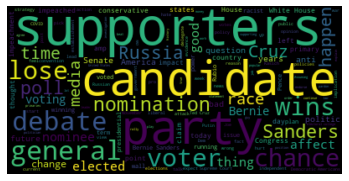

In [25]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in dftrump12["title"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud12.png')
plt.show()

In [23]:
wordcloud.words_

{'supporters': 1.0,
 'party': 0.8290909090909091,
 'GOP': 0.8096969696969697,
 'candidate': 0.7806060606060606,
 'general': 0.6254545454545455,
 'debate': 0.5903030303030303,
 'lose': 0.5684848484848485,
 'wins': 0.5672727272727273,
 'voter': 0.553939393939394,
 'chance': 0.5527272727272727,
 'Sanders': 0.5345454545454545,
 'poll': 0.5163636363636364,
 'Russia': 0.48727272727272725,
 'nomination': 0.48363636363636364,
 'Cruz': 0.4593939393939394,
 'time': 0.44606060606060605,
 'happen': 0.44606060606060605,
 'media': 0.40484848484848485,
 'race': 0.3987878787878788,
 'thing': 0.37575757575757573,
 'good': 0.37454545454545457,
 'elected': 0.3660606060606061,
 'affect': 0.34545454545454546,
 'voting': 0.34545454545454546,
 'Bernie': 0.3418181818181818,
 'change': 0.3406060606060606,
 'question': 0.336969696969697,
 'years': 0.33575757575757575,
 'Senate': 0.32242424242424245,
 'America': 0.3151515151515151,
 'anti': 0.31272727272727274,
 'nominee': 0.3103030303030303,
 'politic': 0.30909